<a href="https://colab.research.google.com/github/Lfickling/PaintingEmotion/blob/model-training/CSVDataTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir mydata
!cp -r /content/drive/MyDrive/data/fakeDataSet.csv /content/mydata

[[0.84 0.25 0.61 0.36]
 [0.21 0.59 0.01 0.13]
 [0.36 0.51 0.64 0.58]
 [0.26 0.65 0.12 0.45]
 [0.38 0.49 0.27 0.07]
 [0.77 0.26 0.29 0.47]
 [0.22 0.56 0.48 0.15]
 [0.45 0.48 0.2  0.21]
 [0.68 0.7  0.71 0.04]
 [0.45 0.25 0.6  0.4 ]]
[0 0 0 0 0 0 0 0 0 0]
Linear SVM accuracy (on X_train): 0.2719
Linear SVM accuracy (on X_val): 0.2146
Poly SVM accuracy (on X_train): 0.3161
Poly SVM accuracy (on X_val): 0.2146
RBF SVM accuracy (on X_train): 0.3354
RBF SVM accuracy (on X_val): 0.1771
Sigmoid SVM accuracy (on X_train): 0.1266
Sigmoid SVM accuracy (on X_val): 0.1187
Logistic Regression accuracy (on X_train): 0.2776
Logistic Regression accuracy (on X_val): 0.2000


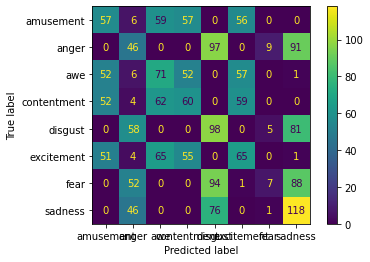

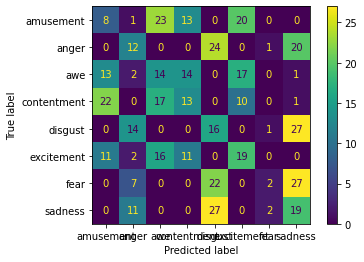

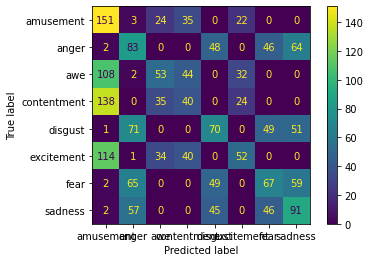

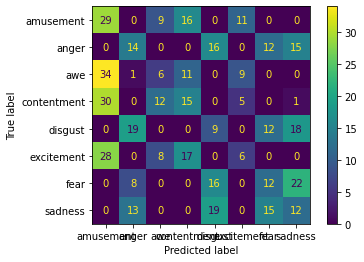

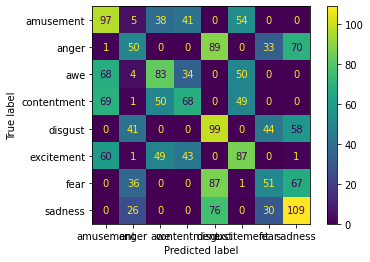

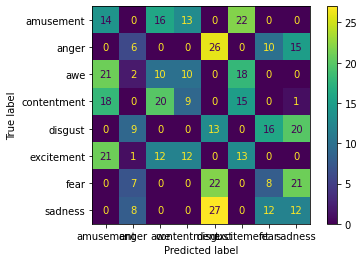

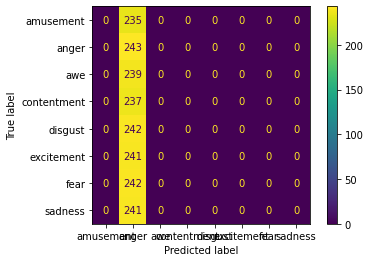

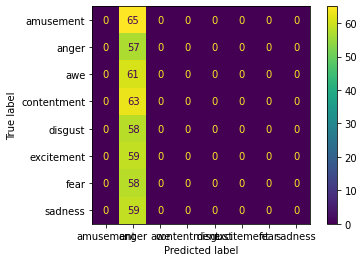

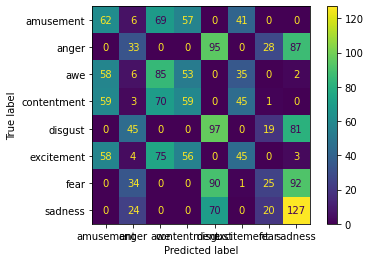

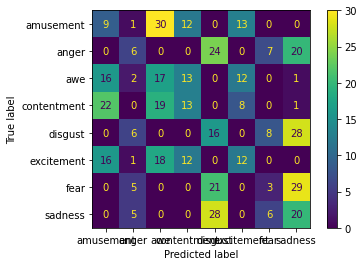

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder


col_names = ['emotion','harmony','variety','emphasis','symmetry']
file = pd.read_csv('./mydata/fakeDataSet.csv',header=None, names=col_names)
df = pd.DataFrame(file)
# print(df.head())

data = ['harmony','variety','emphasis','symmetry']
X = df[data]
X = X.values
y = df.emotion
y = y.values
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X[:10])
print(y[:10])

model = svm.SVC(kernel='linear', C=1.0)
model = model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=le.classes_)
disp.plot()
print(f"Linear SVM accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

predictions_test = model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test), display_labels=le.classes_)
disp.plot()
print(f"Linear SVM accuracy (on X_val): {accuracy_score(y_test, predictions_test):.4f}")

model = svm.SVC(kernel='poly', C=1.0, degree=3)
model = model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=le.classes_)
disp.plot()
print(f"Poly SVM accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

predictions_test = model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test), display_labels=le.classes_)
disp.plot()
print(f"Poly SVM accuracy (on X_val): {accuracy_score(y_test, predictions_test):.4f}")

model = svm.SVC(kernel='rbf', C=1.0)
model = model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=le.classes_)
disp.plot()
print(f"RBF SVM accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

predictions_test = model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test), display_labels=le.classes_)
disp.plot()
print(f"RBF SVM accuracy (on X_val): {accuracy_score(y_test, predictions_test):.4f}")

model = svm.SVC(kernel='sigmoid', C=1.0)
model = model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=le.classes_)
disp.plot()
print(f"Sigmoid SVM accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

predictions_test = model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test), display_labels=le.classes_)
disp.plot()
print(f"Sigmoid SVM accuracy (on X_val): {accuracy_score(y_test, predictions_test):.4f}")

model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model2 = model2.fit(X_train, y_train)
predictions_train = model2.predict(X_train)
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=le.classes_)
disp2.plot()
print(f"Logistic Regression accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

predictions_test = model2.predict(X_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test), display_labels=le.classes_)
disp2.plot()
print(f"Logistic Regression accuracy (on X_val): {accuracy_score(y_test, predictions_test):.4f}")



In [ ]:
###################### this takes forever to run ########################
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# train the model on train set
model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear','poly','sigmoid'],
              'degree': [2,3,4,6]} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

              precision    recall  f1-score   support

   amusement       0.19      0.22      0.20        65
       anger       0.18      0.11      0.13        57
         awe       0.17      0.16      0.17        61
 contentment       0.20      0.14      0.17        63
     disgust       0.15      0.22      0.18        58
  excitement       0.19      0.22      0.20        59
        fear       0.17      0.14      0.15        58
     sadness       0.17      0.20      0.19        59

    accuracy                           0.18       480
   macro avg       0.18      0.18      0.17       480
weighted avg       0.18      0.18      0.17       480

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.247 total time=   0.2s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.221 total time=   0.2s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.234 total time=   0.2s
[CV 4/5] END C=0.1, degree=2, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'degree': 6, 'gamma': 1, 'kernel': 'poly'}

Best model accuracy (on X_train): 0.3573
Best model accuracy (on X_val): 0.2208


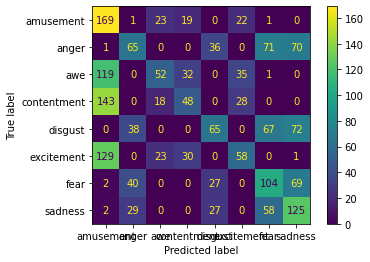

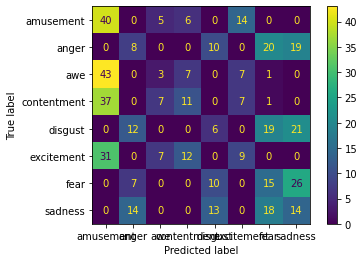

In [ ]:
model = svm.SVC(kernel='poly', C=100, degree=6, gamma=1, probability=True)
model = model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=le.classes_)
disp.plot()
print(f"Best model accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

predictions_test = model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test), display_labels=le.classes_)
disp.plot()
print(f"Best model accuracy (on X_val): {accuracy_score(y_test, predictions_test):.4f}")


In [ ]:
predictions = model.predict_proba([[.9,.5,.1,.1]])
print(predictions)
cls = le.classes_
print(cls)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(cls[np.argmax(predictions)], 100 * np.max(predictions))
)

[[0.22621648 0.00764107 0.24484721 0.2428086  0.00291476 0.26594878
  0.00554132 0.00408177]]
['amusement' 'anger' 'awe' 'contentment' 'disgust' 'excitement' 'fear'
 'sadness']
This image most likely belongs to excitement with a 26.59 percent confidence.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 256)               1280      
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_14 (Bat  (None, 256)             

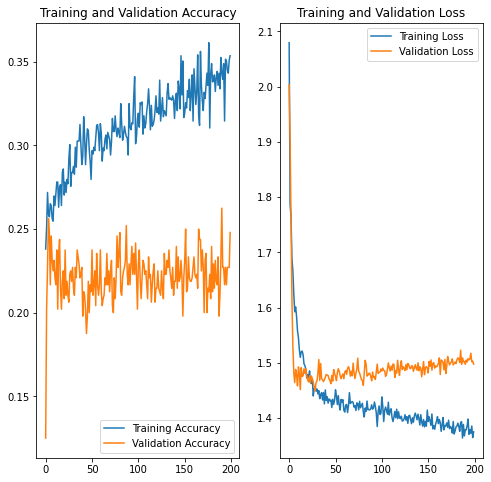

In [26]:
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint


input_shape = [X_train.shape[1]]
checkpoint_path = "model-{epoch:02d}-acc_{accuracy:.4f}-valacc_{val_accuracy:.4f}.h5"
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(.3),
    layers.Dense(8, activation='softmax'),
])

model.compile(optimizer= 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
epochs = 200
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=epochs,
    callbacks=callbacks_list
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
import tensorflow as tf

predictions = model.predict([[.9,.5,.1,.1]])
# score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(le.classes_[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to awe with a 32.03 percent confidence.


NN accuracy (on X_train): 0.4203
NN accuracy (on X_val): 0.2479


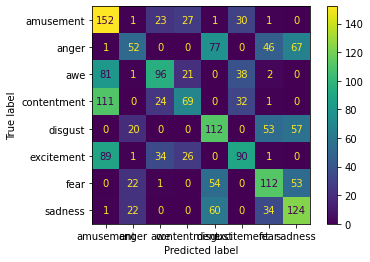

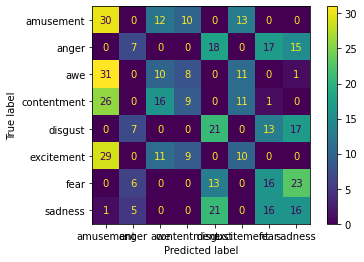

In [33]:
predictions

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
predictions_train = np.argmax(predictions_train, axis=1)
predictions_test = np.argmax(predictions_test, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=le.classes_)
disp.plot()
print(f"NN accuracy (on X_train): {accuracy_score(y_train, predictions_train):.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_test), display_labels=le.classes_)
disp.plot()
print(f"NN accuracy (on X_val): {accuracy_score(y_test, predictions_test):.4f}")